<a href="https://colab.research.google.com/github/dextopman/University-Recommendation-System/blob/main/university_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
university = pd.read_csv('/content/drive/MyDrive/World_University_Rankings_2025.csv', encoding='latin-1')

In [ ]:
university.head(10)

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100.0,...,100,86.8,143,96.0,58,100.0,8,99.0,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100.0,...,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,L,FC,VH,B,100.0,...,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100.0,...,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7
5,6,5,Stanford University,United States,Americas,L,FC,VH,B,100.0,...,284,60.8,244,96.8,45,100.0,2,81.2,148=,96.1
6,7,7,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland,Europe,L,FO,VH,A,98.8,...,25,98.6,63,95.7,64,90.5,73,98.8,18,93.9
7,8,8,National University of Singapore (NUS),Singapore,Asia,XL,FC,VH,A,99.5,...,41,88.9,129,91.6,146,100.0,6,97.7,26=,93.7
8,9,9,UCL,United Kingdom,Europe,XL,FC,VH,A,99.5,...,106,100.0,21,99.9,2,70.3,157,74.8,190=,91.6
9,10,15,California Institute of Technology (Caltech),United States,Americas,S,CO,VH,B,96.5,...,65,79.8,172,65.5,549,31.0,407,62.5,253,90.9


## Data Cleaning

In [ ]:
university.columns

Index(['RANK_2025', 'RANK_2024', 'Institution_Name', 'Location', 'Region',
       'SIZE', 'FOCUS', 'RES.', 'STATUS', 'Academic_Reputation_Score',
       'Academic_Reputation_Rank', 'Employer_Reputation_Score',
       'Employer_Reputation_Rank', 'Faculty_Student_Score',
       'Faculty_Student_Rank', 'Citations_per_Faculty_Score',
       'Citations_per_Faculty_Rank', 'International_Faculty_Score',
       'International_Faculty_Rank', 'International_Students_Score',
       'International_Students_Rank', 'International_Research_Network_Score',
       'International_Research_Network_Rank', 'Employment_Outcomes_Score',
       'Employment_Outcomes_Rank', 'Sustainability_Score',
       'Sustainability_Rank', 'Overall_Score'],
      dtype='object')

In [ ]:
university.dtypes

,0
RANK_2025,object
RANK_2024,object
Institution_Name,object
Location,object
Region,object
SIZE,object
FOCUS,object
RES.,object
STATUS,object
Academic_Reputation_Score,float64


In [ ]:
university.isnull().sum()

,0
RANK_2025,0
RANK_2024,21
Institution_Name,0
Location,0
Region,0
SIZE,0
FOCUS,0
RES.,0
STATUS,37
Academic_Reputation_Score,0


In [ ]:
university.dropna().isnull().sum()

,0
RANK_2025,0
RANK_2024,0
Institution_Name,0
Location,0
Region,0
SIZE,0
FOCUS,0
RES.,0
STATUS,0
Academic_Reputation_Score,0


In [ ]:
university.dtypes

,0
RANK_2025,object
RANK_2024,object
Institution_Name,object
Location,object
Region,object
SIZE,object
FOCUS,object
RES.,object
STATUS,object
Academic_Reputation_Score,float64


In [ ]:
university.shape

(1503, 28)

In [ ]:
university[['Institution_Name', 'Location', 'Region']] = university[['Institution_Name', 'Location',
                                                                     'Region']].astype('string')

In [ ]:
university.dtypes

,0
RANK_2025,object
RANK_2024,object
Institution_Name,string[python]
Location,string[python]
Region,string[python]
SIZE,object
FOCUS,object
RES.,object
STATUS,object
Academic_Reputation_Score,float64


In [ ]:
university.describe()

,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_per_Faculty_Score,International_Faculty_Score,International_Students_Score,International_Research_Network_Score,Employment_Outcomes_Score,Sustainability_Score
count,1503.000000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.286693,19.787292,28.128676,23.503460,30.736707,25.580346,50.129095,23.825083,24.309299
std,22.326168,23.784738,27.613017,27.870692,34.344365,31.098689,29.866588,27.351315,31.074718
min,1.300000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.300000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.000000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.500000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
university_cleaned = university.drop(columns = ['SIZE', 'FOCUS', 'RES.'])
university_cleaned.columns

Index(['RANK_2025', 'RANK_2024', 'Institution_Name', 'Location', 'Region',
       'STATUS', 'Academic_Reputation_Score', 'Academic_Reputation_Rank',
       'Employer_Reputation_Score', 'Employer_Reputation_Rank',
       'Faculty_Student_Score', 'Faculty_Student_Rank',
       'Citations_per_Faculty_Score', 'Citations_per_Faculty_Rank',
       'International_Faculty_Score', 'International_Faculty_Rank',
       'International_Students_Score', 'International_Students_Rank',
       'International_Research_Network_Score',
       'International_Research_Network_Rank', 'Employment_Outcomes_Score',
       'Employment_Outcomes_Rank', 'Sustainability_Score',
       'Sustainability_Rank', 'Overall_Score'],
      dtype='object')

## Data Visualization

In [ ]:
university_cleaned.head(10)

,RANK_2025,RANK_2024,Institution_Name,Location,Region,STATUS,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,Employer_Reputation_Rank,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,B,100.0,4,100.0,2,...,100,86.8,143,96.0,58,100.0,8,99.0,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,A,98.5,22,99.5,11,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,A,100.0,2,100.0,5,...,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,B,100.0,1,100.0,1,...,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,A,100.0,3,100.0,4,...,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7
5,6,5,Stanford University,United States,Americas,B,100.0,5,100.0,3,...,284,60.8,244,96.8,45,100.0,2,81.2,148=,96.1
6,7,7,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland,Europe,A,98.8,19,87.2,57,...,25,98.6,63,95.7,64,90.5,73,98.8,18,93.9
7,8,8,National University of Singapore (NUS),Singapore,Asia,A,99.5,15,91.1,48,...,41,88.9,129,91.6,146,100.0,6,97.7,26=,93.7
8,9,9,UCL,United Kingdom,Europe,A,99.5,14,98.3,18,...,106,100.0,21,99.9,2,70.3,157,74.8,190=,91.6
9,10,15,California Institute of Technology (Caltech),United States,Americas,B,96.5,29,95.3,33,...,65,79.8,172,65.5,549,31.0,407,62.5,253,90.9


In [ ]:
university_cleaned[['Institution_Name', 'Faculty_Student_Score']]

,Institution_Name,Faculty_Student_Score
0,Massachusetts Institute of Technology (MIT),100.0
1,Imperial College London,98.2
2,University of Oxford,100.0
3,Harvard University,96.3
4,University of Cambridge,100.0
...,...,...
1498,University of Montana Missoula,10.6
1499,University of Oradea,4.0
1500,University of San Carlos,3.3
1501,"University Politehnica of Timisoara, UPT",7.2


<Axes: xlabel='Faculty_Student_Score'>

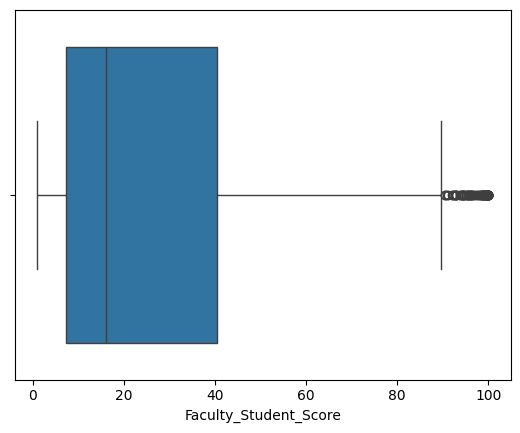

In [ ]:
sns.boxplot(data=university_cleaned, x='Faculty_Student_Score')

In [ ]:
university_cleaned[['Institution_Name', 'International_Faculty_Rank']].head(10)

,Institution_Name,International_Faculty_Rank
0,Massachusetts Institute of Technology (MIT),100
1,Imperial College London,66
2,University of Oxford,120
3,Harvard University,269
4,University of Cambridge,73
5,Stanford University,284
6,ETH Zurich - Swiss Federal Institute of Techno...,25
7,National University of Singapore (NUS),41
8,UCL,106
9,California Institute of Technology (Caltech),65


In [ ]:
university_cleaned['Sustainability_Rank']

,Sustainability_Rank
0,15=
1,6
2,126
3,130
4,127=
...,...
1498,701+
1499,701+
1500,701+
1501,701+


In [ ]:
university_cleaned['Overall_Score'].head(20)


,Overall_Score
0,100
1,98.5
2,96.9
3,96.8
4,96.7
5,96.1
6,93.9
7,93.7
8,91.6
9,90.9


In [ ]:
top_30 = university_cleaned.sort_values(by='Overall_Score', ascending=False).head(30)
top_30

,RANK_2025,RANK_2024,Institution_Name,Location,Region,STATUS,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,Employer_Reputation_Rank,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
1,2,6,Imperial College London,United Kingdom,Europe,A,98.5,22,99.5,11,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,A,100.0,2,100.0,5,...,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,B,100.0,1,100.0,1,...,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,A,100.0,3,100.0,4,...,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7
5,6,5,Stanford University,United States,Americas,B,100.0,5,100.0,3,...,284,60.8,244,96.8,45,100.0,2,81.2,148=,96.1
6,7,7,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland,Europe,A,98.8,19,87.2,57,...,25,98.6,63,95.7,64,90.5,73,98.8,18,93.9
7,8,8,National University of Singapore (NUS),Singapore,Asia,A,99.5,15,91.1,48,...,41,88.9,129,91.6,146,100.0,6,97.7,26=,93.7
8,9,9,UCL,United Kingdom,Europe,A,99.5,14,98.3,18,...,106,100.0,21,99.9,2,70.3,157,74.8,190=,91.6
9,10,15,California Institute of Technology (Caltech),United States,Americas,B,96.5,29,95.3,33,...,65,79.8,172,65.5,549,31.0,407,62.5,253,90.9
10,11,12,University of Pennsylvania,United States,Americas,B,96.3,31,91.9,45,...,188,66.2,226,91.9,137,100.0,7,93.0,71,90.3


<Axes: ylabel='Institution_Name'>

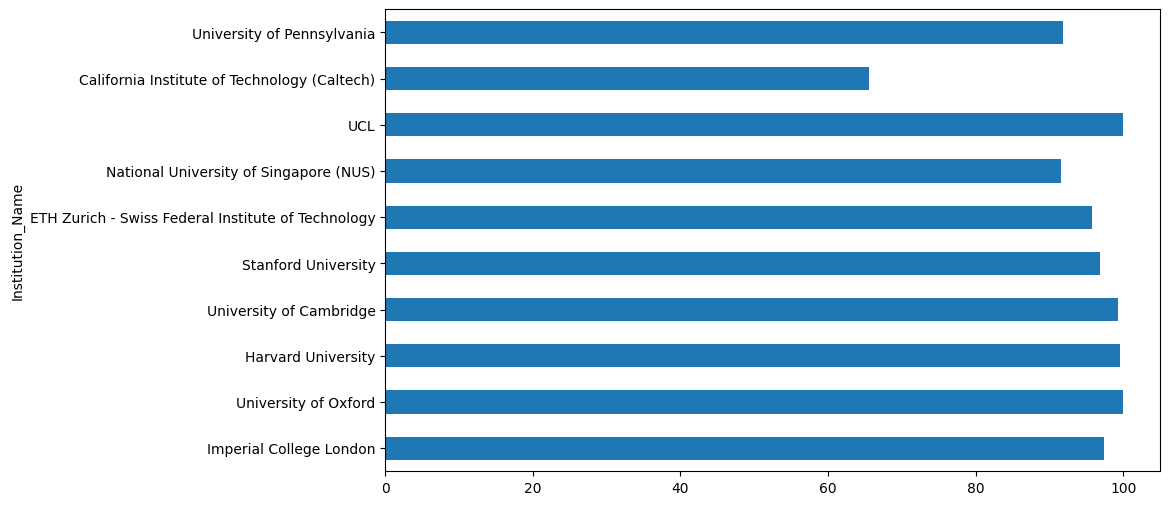

In [ ]:
top_30.set_index('Institution_Name')['International_Research_Network_Score'][0:10].plot.barh(figsize=(10, 6))

In [ ]:
university_cleaned.columns

Index(['RANK_2025', 'RANK_2024', 'Institution_Name', 'Location', 'Region',
       'STATUS', 'Academic_Reputation_Score', 'Academic_Reputation_Rank',
       'Employer_Reputation_Score', 'Employer_Reputation_Rank',
       'Faculty_Student_Score', 'Faculty_Student_Rank',
       'Citations_per_Faculty_Score', 'Citations_per_Faculty_Rank',
       'International_Faculty_Score', 'International_Faculty_Rank',
       'International_Students_Score', 'International_Students_Rank',
       'International_Research_Network_Score',
       'International_Research_Network_Rank', 'Employment_Outcomes_Score',
       'Employment_Outcomes_Rank', 'Sustainability_Score',
       'Sustainability_Rank', 'Overall_Score'],
      dtype='object')

#### in which countries most of the top universities located

In [ ]:
top_30_universities = top_30['Location'].value_counts()
top_30_universities

,count
Location,
United States,9
United Kingdom,5
Australia,4
Switzerland,2
Singapore,2
China (Mainland),2
Canada,2
Hong Kong SAR,1
France,1


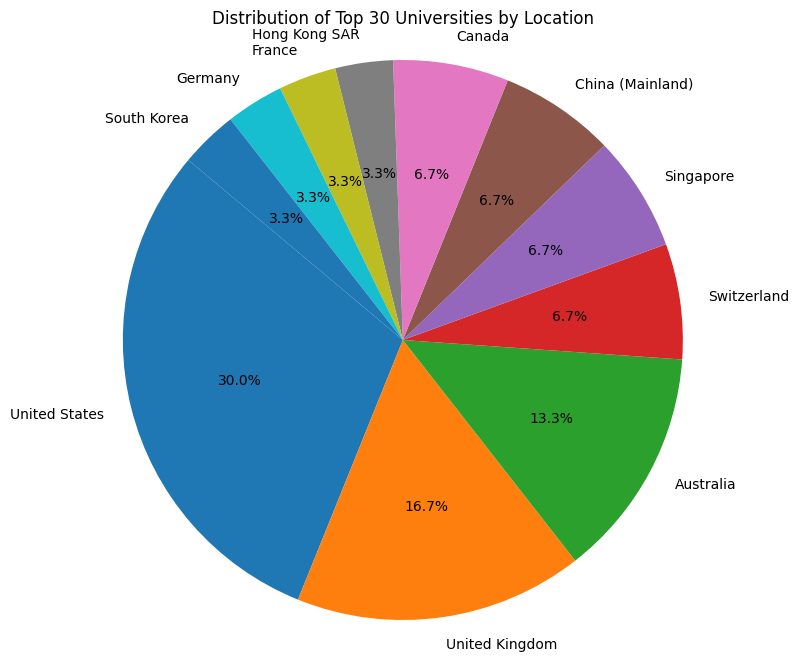

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(top_30_universities, labels=top_30_universities.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 30 Universities by Location')
plt.axis('equal')
plt.show()

Now finding out how many Indian universities in global university rankings

In [ ]:
filtered = university_cleaned[university_cleaned['Location'] == 'India']
filtered

,RANK_2025,RANK_2024,Institution_Name,Location,Region,STATUS,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,Employer_Reputation_Rank,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
117,118,149,Indian Institute of Technology Bombay (IITB),India,Asia,A,58.5,131,86.0,63,...,701+,1.3,701+,52.3,701+,64.5,182,52.5,302=,56.3
149,150,197,Indian Institute of Technology Delhi (IITD),India,Asia,A,54.1,147,80.9,73,...,701+,1.5,701+,63.3,582,35.1,361,32.7,424=,52.1
210,211,225,Indian Institute of Science,India,Asia,A,45.7,181,26.3,362,...,701+,1.5,701+,39.1,701+,13.1,701+,23.7,500=,45
222,222,271,Indian Institute of Technology Kharagpur (IIT-...,India,Asia,A,34.0,257,51.1,173,...,701+,1.1,701+,69.3,492,33.0,386,44.3,348=,43.7
226,227,285,Indian Institute of Technology Madras (IITM),India,Asia,A,42.4,203,63.2,127,...,701+,1.6,701+,37.5,701+,27.0,444,44.6,343=,43.5
262,263,278,Indian Institute of Technology Kanpur (IITK),India,Asia,A,36.9,234,56.9,142,...,701+,1.1,701+,38.8,701+,19.6,567,22.0,516=,39.3
329,328,407,University of Delhi,India,Asia,A,38.1,225,35.3,269,...,701+,1.5,701+,75.1,406,96.0,44,70.6,220,33.8
334,335,369,Indian Institute of Technology Roorkee (IITR),India,Asia,A,19.4,462,29.0,325,...,701+,2.0,701+,44.3,701+,6.4,701+,37.9,386=,33.4
343,344,364,Indian Institute of Technology Guwahati (IITG),India,Asia,A,18.8,480,32.0,295,...,701+,1.2,701+,51.2,701+,4.9,701+,2.2,701+,32.9
382,383,427,Anna University,India,Asia,A,10.0,601+,12.0,601+,...,NaN,1.3,701+,89.2,181,5.9,701+,24.7,491,30.6


In [ ]:
filtered.shape

(46, 25)

In [ ]:
filtered.head(5)

,RANK_2025,RANK_2024,Institution_Name,Location,Region,STATUS,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,Employer_Reputation_Rank,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
117,118,149,Indian Institute of Technology Bombay (IITB),India,Asia,A,58.5,131,86.0,63,...,701+,1.3,701+,52.3,701+,64.5,182,52.5,302=,56.3
149,150,197,Indian Institute of Technology Delhi (IITD),India,Asia,A,54.1,147,80.9,73,...,701+,1.5,701+,63.3,582,35.1,361,32.7,424=,52.1
210,211,225,Indian Institute of Science,India,Asia,A,45.7,181,26.3,362,...,701+,1.5,701+,39.1,701+,13.1,701+,23.7,500=,45
222,222,271,Indian Institute of Technology Kharagpur (IIT-...,India,Asia,A,34.0,257,51.1,173,...,701+,1.1,701+,69.3,492,33.0,386,44.3,348=,43.7
226,227,285,Indian Institute of Technology Madras (IITM),India,Asia,A,42.4,203,63.2,127,...,701+,1.6,701+,37.5,701+,27.0,444,44.6,343=,43.5


In [ ]:
import plotly.express as px

px.bar(filtered, x='Institution_Name', y='International_Students_Score', title='Indian Institutes based on foreign student enrollment')

In [ ]:
top_indian_universities_by_intl_students = filtered.sort_values(by='International_Students_Score', ascending=False)

top_5_indian_universities = top_indian_universities_by_intl_students.head(5)

px.bar(top_5_indian_universities, x='Institution_Name', y='International_Students_Score', title='Top 5 Indian Universities based on International Students Score')

from the above data we can see that top 5 indian universities except Osmania University that have high international students scores are private universities

## EDA(Exploratory Data Analysis)

In [ ]:
numerical_features = ['Overall_Score', 'Faculty_Student_Score',
                      'International_Faculty_Score', 'International_Students_Score',
                      'International_Research_Network_Score', 'Sustainability_Score']

# Convert relevant columns to numeric, coercing errors to NaN
university_cleaned['Overall_Score'] = pd.to_numeric(university_cleaned['Overall_Score'], errors='coerce')
university_cleaned['International_Faculty_Score'] = pd.to_numeric(university_cleaned['International_Faculty_Score'], errors='coerce')
university_cleaned['International_Students_Score'] = pd.to_numeric(university_cleaned['International_Students_Score'], errors='coerce')
university_cleaned['International_Research_Network_Score'] = pd.to_numeric(university_cleaned['International_Research_Network_Score'], errors='coerce')
university_cleaned['Sustainability_Score'] = pd.to_numeric(university_cleaned['Sustainability_Score'], errors='coerce')


# Fill missing values in numerical columns with the mean
university_cleaned[numerical_features] = university_cleaned[numerical_features].fillna(university_cleaned[numerical_features].mean())

In [ ]:
university_cleaned.columns

Index(['RANK_2025', 'RANK_2024', 'Institution_Name', 'Location', 'Region',
       'STATUS', 'Academic_Reputation_Score', 'Academic_Reputation_Rank',
       'Employer_Reputation_Score', 'Employer_Reputation_Rank',
       'Faculty_Student_Score', 'Faculty_Student_Rank',
       'Citations_per_Faculty_Score', 'Citations_per_Faculty_Rank',
       'International_Faculty_Score', 'International_Faculty_Rank',
       'International_Students_Score', 'International_Students_Rank',
       'International_Research_Network_Score',
       'International_Research_Network_Rank', 'Employment_Outcomes_Score',
       'Employment_Outcomes_Rank', 'Sustainability_Score',
       'Sustainability_Rank', 'Overall_Score'],
      dtype='object')

In [ ]:
university_cleaned[numerical_features]

,Overall_Score,Faculty_Student_Score,International_Faculty_Score,International_Students_Score,International_Research_Network_Score,Sustainability_Score
0,100.000000,100.0,99.3,86.8,96.0,99.0
1,98.500000,98.2,100.0,99.6,97.4,99.7
2,96.900000,100.0,98.1,97.7,100.0,85.0
3,96.800000,96.3,74.1,69.0,99.6,84.4
4,96.700000,100.0,100.0,94.8,99.3,84.8
...,...,...,...,...,...,...
1498,41.840333,10.6,1.3,1.9,6.5,1.0
1499,41.840333,4.0,1.5,5.2,34.5,2.3
1500,41.840333,3.3,2.1,2.1,6.4,1.0
1501,41.840333,7.2,1.4,2.5,18.6,1.1


In [ ]:

university_cleaned['STATUS']

,STATUS
0,B
1,A
2,A
3,B
4,A
...,...
1498,A
1499,A
1500,C
1501,A


In [ ]:
university_cleaned['STATUS'].fillna('E', inplace=True)
university_cleaned['STATUS']

,STATUS
0,B
1,A
2,A
3,B
4,A
...,...
1498,A
1499,A
1500,C
1501,A


## Performing Feature Engineering using MinMaxScaler

MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.
(source: https://www.geeksforgeeks.org)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
university_cleaned[numerical_features] = scaler.fit_transform(university_cleaned[numerical_features])

In [ ]:
university_cleaned['score_mix'] = university_cleaned['Academic_Reputation_Score'] * 0.5 + university_cleaned['Sustainability_Score'] * 0.5

In [ ]:
university_cleaned['score_mix']

,score_mix
0,50.494949
1,49.748485
2,50.424242
3,50.421212
4,50.423232
...,...
1498,1.500000
1499,2.806566
1500,3.600000
1501,2.050505


In [ ]:
university_cleaned

,RANK_2025,RANK_2024,Institution_Name,Location,Region,STATUS,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,Employer_Reputation_Rank,...,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score,score_mix
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,B,100.0,4,100.0,2,...,0.866667,143,0.959596,58,100.0,8,0.989899,15=,1.000000,50.494949
1,2,6,Imperial College London,United Kingdom,Europe,A,98.5,22,99.5,11,...,0.995960,44,0.973737,34,93.4,61,0.996970,6,0.981061,49.748485
2,3,3,University of Oxford,United Kingdom,Europe,A,100.0,2,100.0,5,...,0.976768,73,1.000000,1,100.0,3,0.848485,126,0.960859,50.424242
3,4,4,Harvard University,United States,Americas,B,100.0,1,100.0,1,...,0.686869,215,0.995960,5,100.0,1,0.842424,130,0.959596,50.421212
4,5,2,University of Cambridge,United Kingdom,Europe,A,100.0,3,100.0,4,...,0.947475,98,0.992929,10,100.0,5,0.846465,127=,0.958333,50.423232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,United States,Americas,A,3.0,601+,2.2,601+,...,0.009091,701+,0.055556,701+,3.1,701+,0.000000,701+,0.265661,1.500000
1499,1401+,1401+,University of Oradea,Romania,Europe,A,5.6,601+,2.2,601+,...,0.042424,701+,0.338384,701+,6.2,701+,0.013131,701+,0.265661,2.806566
1500,1401+,1201-1400,University of San Carlos,Philippines,Asia,C,7.2,601+,9.4,601+,...,0.011111,701+,0.054545,701+,9.6,701+,0.000000,701+,0.265661,3.600000
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",Romania,Europe,A,4.1,601+,4.2,601+,...,0.015152,701+,0.177778,701+,3.9,701+,0.001010,701+,0.265661,2.050505


In [ ]:
rank_df = university_cleaned.sort_values('score_mix', ascending=False).head(15)

In [ ]:
import plotly.express as px

px.bar(rank_df, x='Institution_Name', y='score_mix', title='Top 15 Universities based on environment friendly campus')

## Building the Recommendation System using Cosine Similarity

Cosine similarity is a metric used to measure the similarity between two non-zero vectors. It calculates the cosine of the angle between the vectors, with values ranging from -1 (opposite direction) to 1 (same direction). A cosine similarity of 0 indicates that the vectors are orthogonal (perpendicular).

The cosine_similarity() function from scikit-learn’s metrics.pairwise module computes the pairwise cosine similarities between a set of input vectors. It takes a 2D array-like object as input, where each row represents a vector, and returns a square matrix containing the cosine similarities between all pairs of vectors. (source: www.sklearner.com)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
for feature in university_cleaned[numerical_features]:
  university_cleaned[feature] = pd.to_numeric(university_cleaned[feature], errors='coerce')

university_cleaned[numerical_features] = university_cleaned[numerical_features].fillna(university_cleaned[numerical_features].mean())

In [ ]:
feature_matrix = university_cleaned[numerical_features].values
cosine_sim = cosine_similarity(feature_matrix)

In [ ]:
indices = pd.Series(university_cleaned.index, index=university_cleaned['Institution_Name']).drop_duplicates()

def universities_recom(institution_name, cosine_sim=cosine_sim, df=university_cleaned, indices=indices):
  if institution_name not in indices:
    print("Univeristy not found in the list")
    return pd.DataFrame()

  idx = indices[institution_name]
  ##Getting similarity scores with that institution
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Sort the universities based on similarity rank
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Get the scores of the 19 most similar universities (excluding the input university itself)
  sim_scores = sim_scores[1:20]

  # get the univeristy indices
  university_indices = [i[0] for i in sim_scores]

  # Return the top 20 most similar universities
  return df.iloc[university_indices]



### Testing the recommendation system

In [ ]:
university_new = universities_recom('Stanford University')
print("\nRecommended universities for Stanford University:")
print(university_new[['Institution_Name', 'Location', 'Overall_Score']])


Recommended universities for Stanford University:
                                     Institution_Name          Location  \
3                                  Harvard University     United States   
23                                     Université PSL            France   
10                         University of Pennsylvania     United States   
43                   University of Michigan-Ann Arbor     United States   
22                                    Yale University     United States   
0        Massachusetts Institute of Technology (MIT)      United States   
50                            Northwestern University     United States   
59                             Universiti Malaya (UM)          Malaysia   
4                             University of Cambridge    United Kingdom   
70                  Universidad de Buenos Aires (UBA)         Argentina   
2                                University of Oxford    United Kingdom   
1                             Imperial College Lo

In [ ]:
university_new = universities_recom('Peking University')
print("\nsimilar universities like Peking University:")
print(university_new[['Institution_Name', 'Location', 'Overall_Score']])


similar universities like Peking University:
                                       Institution_Name          Location  \
1024                       Chungbuk National University       South Korea   
1247                          Jeju National University        South Korea   
43                     University of Michigan-Ann Arbor     United States   
50                              Northwestern University     United States   
19                                  Tsinghua University  China (Mainland)   
5                                   Stanford University     United States   
23                                       Université PSL            France   
3                                    Harvard University     United States   
1030   Escuela Superior Politécnica del Litoral (ESPOL)           Ecuador   
1357                         Universitas Sumatera Utara         Indonesia   
84           Tokyo Institute of Technology (Tokyo Tech)             Japan   
856                        Chu

In [ ]:
university_new = universities_recom('Chandigarh University')
print("\nsimilar universities like Chandigarh University:")
print(university_new[['Institution_Name', 'Location', 'Overall_Score']])


similar universities like Chandigarh University:
                                       Institution_Name          Location  \
1375                              University of Ostrava    Czech Republic   
1042  Indiana UniversityPurdue University Indianapolis     United States   
1366                            University of Bialystok            Poland   
1346       Universidade Federal de Juiz de Fora- (UFJF)            Brazil   
1008                         Amrita Vishwa Vidyapeetham             India   
47                                  Zhejiang University  China (Mainland)   
1047                                Jiangnan University  China (Mainland)   
144                                  Nanjing University  China (Mainland)   
1159               Universiti Malaysia Sarawak (UNIMAS)          Malaysia   
909   Imam Mohammad Ibn Saud Islamic University  IMSIU      Saudi Arabia   
1004                               Yeungnam University        South Korea   
1165                      

In [ ]:
data = university_cleaned.copy()

data.columns

Index(['RANK_2025', 'RANK_2024', 'Institution_Name', 'Location', 'Region',
       'STATUS', 'Academic_Reputation_Score', 'Academic_Reputation_Rank',
       'Employer_Reputation_Score', 'Employer_Reputation_Rank',
       'Faculty_Student_Score', 'Faculty_Student_Rank',
       'Citations_per_Faculty_Score', 'Citations_per_Faculty_Rank',
       'International_Faculty_Score', 'International_Faculty_Rank',
       'International_Students_Score', 'International_Students_Rank',
       'International_Research_Network_Score',
       'International_Research_Network_Rank', 'Employment_Outcomes_Score',
       'Employment_Outcomes_Rank', 'Sustainability_Score',
       'Sustainability_Rank', 'Overall_Score', 'score_mix'],
      dtype='object')

In [ ]:
data['Institution_Name']

,Institution_Name
0,Massachusetts Institute of Technology (MIT)
1,Imperial College London
2,University of Oxford
3,Harvard University
4,University of Cambridge
...,...
1498,University of Montana Missoula
1499,University of Oradea
1500,University of San Carlos
1501,"University Politehnica of Timisoara, UPT"


In [ ]:
indices = pd.Series(data.index,
                    index=data['Institution_Name']).drop_duplicates()

In [ ]:
indices

,0
Institution_Name,
Massachusetts Institute of Technology (MIT),0
Imperial College London,1
University of Oxford,2
Harvard University,3
University of Cambridge,4
...,...
University of Montana Missoula,1498
University of Oradea,1499
University of San Carlos,1500


In [ ]:
indices['University of San Carlos']

np.int64(1500)

In [ ]:
universities_recom('University of San Carlos')

,RANK_2025,RANK_2024,Institution_Name,Location,Region,STATUS,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,Employer_Reputation_Rank,...,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score,score_mix
1479,1401+,1401+,Universidad Tecnológica de Bolívar,Colombia,Americas,B,2.2,601+,3.5,601+,...,0.013131,701+,0.058586,701+,6.4,701+,0.000000,701+,0.265661,1.100000
1451,1401+,1401+,"Universidad Católica Boliviana ""San Pablo""",Bolivia,Americas,B,3.9,601+,2.9,601+,...,0.017172,701+,0.067677,701+,26.2,452,0.000000,701+,0.265661,1.950000
1407,1401+,1201-1400,East West University,Bangladesh,Asia,B,6.8,601+,12.8,601+,...,0.000000,701+,0.064646,701+,3.9,701+,0.001010,701+,0.265661,3.400505
1470,1401+,1401+,Universidad del Valle de Mexico (UVM),Mexico,Americas,C,3.8,601+,9.9,601+,...,0.006061,701+,0.038384,701+,3.1,701+,0.000000,701+,0.265661,1.900000
1118,1001-1200,1001-1200,Universidad de Lima,Peru,Americas,B,9.6,601+,26.2,363,...,0.011111,701+,0.077778,701+,20.9,549,0.000000,701+,0.265661,4.800000
1413,1401+,1401+,International University of Business Agricultu...,Bangladesh,Asia,B,6.6,601+,4.1,601+,...,0.003030,701+,0.076768,701+,3.8,701+,0.000000,701+,0.265661,3.300000
1425,1401+,1401+,Pontifícia Universidade Católica de Minas Gera...,Brazil,Americas,B,4.9,601+,4.6,601+,...,0.001010,701+,0.073737,701+,9.4,701+,0.000000,701+,0.265661,2.450000
1477,1401+,1201-1400,Universidad San Ignacio de Loyola,Peru,Americas,B,6.1,601+,9.0,601+,...,0.006061,701+,0.066667,701+,3.7,701+,0.003030,701+,0.265661,3.051515
1452,1401+,1401+,Universidad Católica de Colombia,Colombia,Americas,B,6.1,601+,3.2,601+,...,0.001010,701+,0.040404,701+,2.3,701+,0.000000,701+,0.265661,3.050000
1423,1401+,1201-1400,National University of Modern Languages (NUML)...,Pakistan,Asia,E,7.0,601+,7.3,601+,...,0.002020,701+,0.071717,701+,2.6,701+,0.002020,701+,0.265661,3.501010


In [ ]:
dataframe = data.reset_index()
dataframe

,index,RANK_2025,RANK_2024,Institution_Name,Location,Region,STATUS,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,...,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score,score_mix
0,0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,B,100.0,4,100.0,...,0.866667,143,0.959596,58,100.0,8,0.989899,15=,1.000000,50.494949
1,1,2,6,Imperial College London,United Kingdom,Europe,A,98.5,22,99.5,...,0.995960,44,0.973737,34,93.4,61,0.996970,6,0.981061,49.748485
2,2,3,3,University of Oxford,United Kingdom,Europe,A,100.0,2,100.0,...,0.976768,73,1.000000,1,100.0,3,0.848485,126,0.960859,50.424242
3,3,4,4,Harvard University,United States,Americas,B,100.0,1,100.0,...,0.686869,215,0.995960,5,100.0,1,0.842424,130,0.959596,50.421212
4,4,5,2,University of Cambridge,United Kingdom,Europe,A,100.0,3,100.0,...,0.947475,98,0.992929,10,100.0,5,0.846465,127=,0.958333,50.423232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1498,1401+,1201-1400,University of Montana Missoula,United States,Americas,A,3.0,601+,2.2,...,0.009091,701+,0.055556,701+,3.1,701+,0.000000,701+,0.265661,1.500000
1499,1499,1401+,1401+,University of Oradea,Romania,Europe,A,5.6,601+,2.2,...,0.042424,701+,0.338384,701+,6.2,701+,0.013131,701+,0.265661,2.806566
1500,1500,1401+,1201-1400,University of San Carlos,Philippines,Asia,C,7.2,601+,9.4,...,0.011111,701+,0.054545,701+,9.6,701+,0.000000,701+,0.265661,3.600000
1501,1501,1401+,1401+,"University Politehnica of Timisoara, UPT",Romania,Europe,A,4.1,601+,4.2,...,0.015152,701+,0.177778,701+,3.9,701+,0.001010,701+,0.265661,2.050505


In [ ]:
import joblib

In [ ]:
data.to_csv("/content/drive/MyDrive/new/university_data_for_app.csv", index=False)
dataframe.to_csv("/content/drive/MyDrive/new/university_data_for_app_with_index.csv", index=True)

In [ ]:
joblib.dump(cosine_sim, "/content/drive/MyDrive/new/cosine_similarity.pkl")

['/content/drive/MyDrive/new/cosine_similarity.pkl']